# Data Analysis with Bootstrap-coupled ESTimation (DABEST)

<p> Data Analysis with Bootstrap-coupled ESTimation (DABEST) was developed by Ho <em>et al</em>. (2019) <em>Nature Methods</em> (<a target="_blank" href="https://www.biorxiv.org/content/10.1101/377978v2.full">https://www.biorxiv.org/content/10.1101/377978v2.full</a> see <a target="_blank" href="https://rdcu.be/bHhJ4">full-text here</a>).</p>

<p> DABEST creates an <em>estimation plot</em>, aka a "Gardner–Altman plot", which shows the distribution of mean differences (or effect sizes) between conditions. A "Gardner–Altman plot" presents all data points as a swarm plot and the mean difference(s), or effect size(s), as a bootstrap 95% confidence interval.</p>

<p> See the manual for using DABEST in R at <a target="_blank" href="https://acclab.github.io/dabestr/">https://acclab.github.io/dabestr/</a>.</p>

<p> See the original R code from Ho <em>et al</em>. (2019) on <a target="_blank" href="https://github.com/ACCLAB/dabestr">GitHub</a>.</p>



In [2]:
# which version of R
R.version.string

[1] "R version 4.5.0 (2025-04-11)"

# Install packages

In [3]:
# Install packages that are not already installed
if (!requireNamespace("tidyverse", quietly = TRUE)) {
  install.packages("tidyverse")
}
if (!requireNamespace("dabestr", quietly = TRUE)) {
  install.packages("dabestr")
}
library(tidyverse)
library(dabestr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘beeswarm’, ‘vipor’, ‘brunnermunzel’, ‘cowplot’, ‘effsize’, ‘ggbeeswarm’, ‘ggsci’


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘dabestr’


The following object is masked from ‘package:base’:

    load




# DABEST using example data
from https://acclab.github.io/dabestr/

## Import and examine data

In [4]:
# import data from dabestr library
data("non_proportional_data")

# view data
head(non_proportional_data)

# examine data
str(non_proportional_data)

Gender,ID,Group,Measurement
<chr>,<int>,<chr>,<dbl>
Male,1,Control 1,3.234212
Male,2,Control 1,3.283786
Male,3,Control 1,2.956279
Male,4,Control 1,2.818601
Male,5,Control 1,3.242355
Male,6,Control 1,2.272818


tibble [180 × 4] (S3: tbl_df/tbl/data.frame)
 $ Gender     : chr [1:180] "Male" "Male" "Male" "Male" ...
 $ ID         : int [1:180] 1 2 3 4 5 6 7 8 9 10 ...
 $ Group      : chr [1:180] "Control 1" "Control 1" "Control 1" "Control 1" ...
 $ Measurement: num [1:180] 3.23 3.28 2.96 2.82 3.24 ...


In [5]:
# examine unique values in Group
print("Unique values in Group:")
unique(non_proportional_data$Group)

[1] "Unique values in Group:"


[1] "Control 1" "Control 2" "Control 3" "Test 1"    "Test 2"    "Test 3"   
[7] "Test 4"    "Test 5"    "Test 6"

In [6]:
# examine unique values in Gender
print("Unique values in Gender:")
unique(non_proportional_data$Gender)

[1] "Unique values in Gender:"


[1] "Male"   "Female"

## Load data in dabest for unpaired 2-group comparison

In [7]:
# Load data in dabest
# The mean difference for an unpaired 2-group comparison.
# Instead of mean_diff, can also use: median_diff, cohens_d, or hedges_g.
two_groups_unpaired.mean_diff <- load(
  data = non_proportional_data,
  x = Group,
  y = Measurement,
  idx = c("Control 1", "Test 1"),
  ci = 95
) %>%
  mean_diff()

### Analyse and view Estimation plot

In [8]:
# Examine the mean difference
print(two_groups_unpaired.mean_diff)

DABESTR v2025.3.14

Good afternoon!
The current time is 12:15 PM on Monday April 28, 2025.

The character(0) mean difference between Test 1 and Control 1 is 0.585 [95%CI 0.307, 0.869].
The p-value of the two-sided permutation t-test is 0.0004, calculated for legacy purposes only.

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
Any p-value reported is the probability of observing the effect size (or greater),
assuming the null hypothesis of zero difference is true.
For each p-value, 5000 reshuffles of the control and test labels were performed.



In [ ]:
# view all statistical outputs
print(two_groups_unpaired.mean_diff$boot_result)

In [ ]:
# extract the permutations
print(two_groups_unpaired.mean_diff$permtest_pvals$permutation_test_results)

# extract the permutation test’s p values
print(two_groups_unpaired.mean_diff$permtest_pvals$pval_permtest)

# extract the statistical tests
print(two_groups_unpaired.mean_diff$permtest_pvals$pval_for_tests)

# extract the p value results
print(two_groups_unpaired.mean_diff$permtest_pvals$pvalues)

[1] "Gardner-Altman estimation plot"


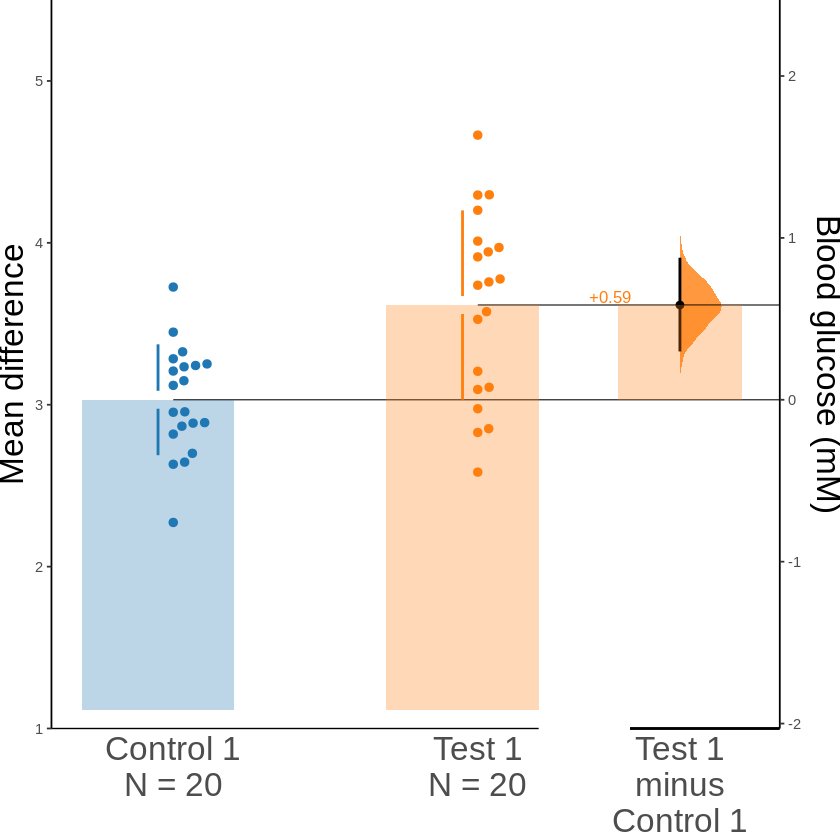

In [9]:
# build Gardner-Altman estimation plot (edit aesthetics at https://acclab.github.io/dabestr/articles/plot_aesthetics.html)
print("Gardner-Altman estimation plot")
plot1 <- dabest_plot(two_groups_unpaired.mean_diff,
  float_contrast = TRUE, # TRUE = Gardner-Altman estimation plot. FALSE = Cumming estimation plot
  swarm_label = "Mean difference",
  contrast_label = "Blood glucose (mM)",
  swarm_ylim = c(1, 5.5), contrast_ylim = c(2, -2),
  raw_marker_size = 2, raw_marker_alpha = 2, raw_bar_width = 0.5,
  swarm_x_text = 20,
  swarm_y_text = 20,
  contrast_x_text = 20,
  contrast_y_text = 20
)
plot1

[1] "Cumming estimation plot"


Warning message in get_plot_component(plot, "guide-box"):
“Multiple components found; returning the first one. To return all, use `return_all = TRUE`.”


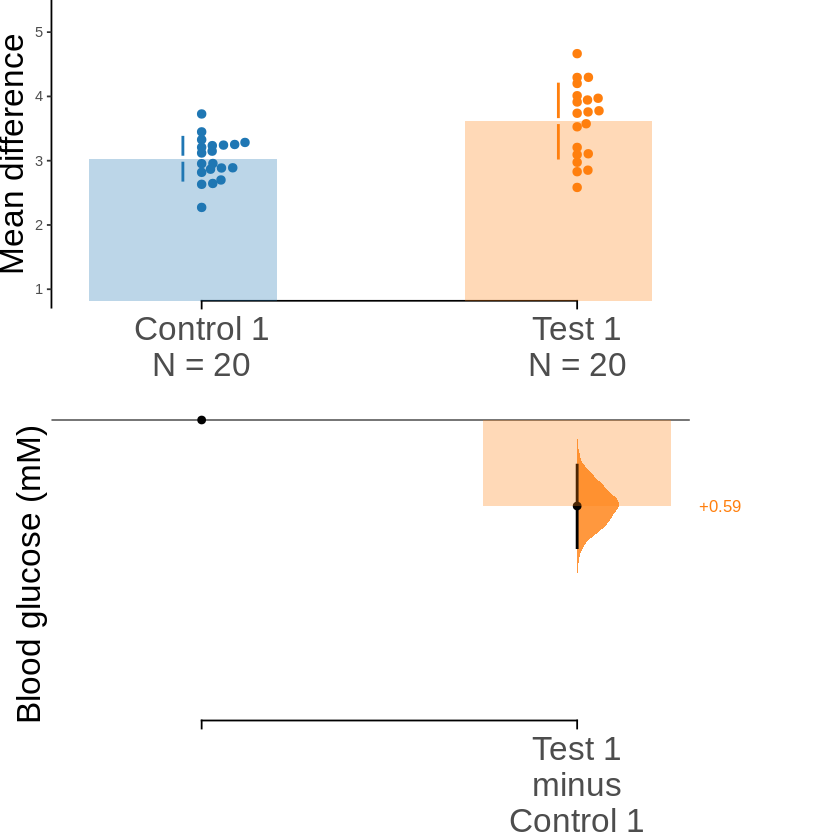

In [10]:
# build Cumming estimation plot (edit aesthetics at https://acclab.github.io/dabestr/articles/plot_aesthetics.html)
print("Cumming estimation plot")
plot2 <- dabest_plot(two_groups_unpaired.mean_diff,
  float_contrast = FALSE, # TRUE = Gardner-Altman estimation plot. FALSE = Cumming estimation plot
  swarm_label = "Mean difference",
  contrast_label = "Blood glucose (mM)",
  swarm_ylim = c(1, 5.5), contrast_ylim = c(2, 0),
  raw_marker_size = 2, raw_marker_alpha = 2, raw_bar_width = 0.5,
  swarm_x_text = 20,
  swarm_y_text = 20,
  contrast_x_text = 20,
  contrast_y_text = 20
)
plot2

## Load data in dabest for 2-way comparison

In [11]:
# Load data in dabest
# The mean difference for an unpaired 2-group comparison.
# Instead of mean_diff, can also use: median_diff, cohens_d, or hedges_g.
two_group_two_condition <- load(
  data = non_proportional_data,
  x = Group,
  y = Measurement,
  idx = list(
    c("Control 1", "Control 2"),
    c("Test 1", "Test 2")
  ),
  ci = 95
)

In [12]:
# view head of non_proportional_data
head(non_proportional_data)

Gender,ID,Group,Measurement
<chr>,<int>,<chr>,<dbl>
Male,1,Control 1,3.234212
Male,2,Control 1,3.283786
Male,3,Control 1,2.956279
Male,4,Control 1,2.818601
Male,5,Control 1,3.242355
Male,6,Control 1,2.272818


### Analyse and view Estimation plot

In [13]:
# Generate the mean difference
two_group_two_condition.mean_diff <- mean_diff(two_group_two_condition)

# Examine the mean difference
two_group_two_condition.mean_diff

DABESTR v2025.3.14

Good afternoon!
The current time is 12:15 PM on Monday April 28, 2025.

The character(0) mean difference between Control 2 and Control 1 is 0.772 [95%CI 0.343, 1.166].
The p-value of the two-sided permutation t-test is 0.0015, calculated for legacy purposes only.

The character(0) mean difference between Test 2 and Test 1 is -0.871 [95%CI -1.244, -0.489].
The p-value of the two-sided permutation t-test is 0.0001, calculated for legacy purposes only.

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
Any p-value reported is the probability of observing the effect size (or greater),
assuming the null hypothesis of zero difference is true.
For each p-value, 5000 reshuffles of the control and test labels were performed.


[1] "Gardner-Altman estimation plot"


Warning message in get_plot_component(plot, "guide-box"):
“Multiple components found; returning the first one. To return all, use `return_all = TRUE`.”


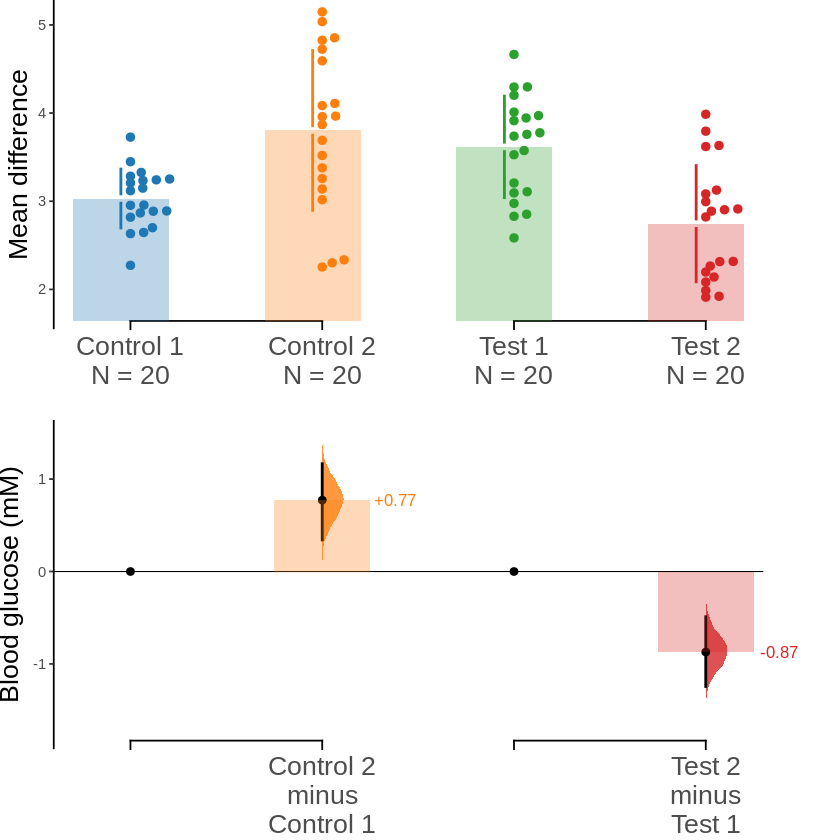

In [14]:
# build Gardner-Altman estimation plot (edit aesthetics at https://acclab.github.io/dabestr/articles/plot_aesthetics.html)
print("Gardner-Altman estimation plot")
plot3 <- dabest_plot(two_group_two_condition.mean_diff,
  float_contrast = TRUE, # TRUE = Gardner-Altman estimation plot. FALSE = Cumming estimation plot
  swarm_label = "Mean difference",
  contrast_label = "Blood glucose (mM)",
  raw_marker_size = 2, raw_marker_alpha = 2, raw_bar_width = 0.5,
  swarm_x_text = 16,
  swarm_y_text = 16,
  contrast_x_text = 16,
  contrast_y_text = 16
)
plot3

# DABEST using simulated data for an RCT

## Simulate PAIRED data

In [15]:
# Simulate some data
set.seed(123)
n <- 30
C <- rnorm(n, mean = 3.0, sd = 0.5)  # Control group
T <- rnorm(n, mean = 3.3, sd = 0.5)  # Treatment group

# Create an "id" column for paired observations. Remove if data are UNPAIRED.
ids <- 1:n

df_RCT <- data.frame(
  ID = rep(ids, 2), # each id appears twice, one for each group
  Group = rep(c("Control", "Treatment"), each = n),
  Measurement = c(C, T)
)

# Examine the dataframe structure and content
head(df_RCT)
str(df_RCT)

,ID,Group,Measurement
,<int>,<chr>,<dbl>
1,1,Control,2.719762
2,2,Control,2.884911
3,3,Control,3.779354
4,4,Control,3.035254
5,5,Control,3.064644
6,6,Control,3.857532


'data.frame':	60 obs. of  3 variables:
 $ ID         : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Group      : chr  "Control" "Control" "Control" "Control" ...
 $ Measurement: num  2.72 2.88 3.78 3.04 3.06 ...


In [16]:
summary(df_RCT)

       ID          Group            Measurement   
 Min.   : 1.0   Length:60          Min.   :2.017  
 1st Qu.: 8.0   Class :character   1st Qu.:2.774  
 Median :15.5   Mode  :character   Median :3.192  
 Mean   :15.5                      Mean   :3.183  
 3rd Qu.:23.0                      3rd Qu.:3.581  
 Max.   :30.0                      Max.   :4.384  

In [17]:
unique(df_RCT$Group)

[1] "Control"   "Treatment"

### Visualise data distribution

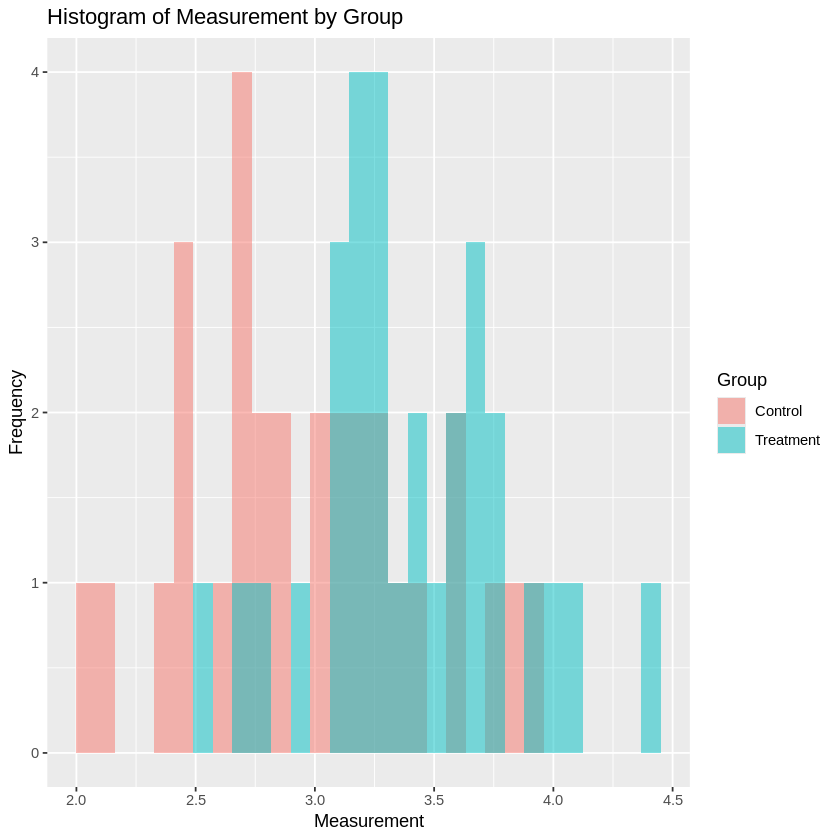

In [18]:
# build a histogram to visualise Measurement in each Group in df_RCT
plot4 <- ggplot(df_RCT, aes(x = Measurement, fill = Group)) +
  geom_histogram(bins=30, position = "identity", alpha = 0.5) +
  labs(title = "Histogram of Measurement by Group", x = "Measurement", y = "Frequency", fill = "Group")
plot4

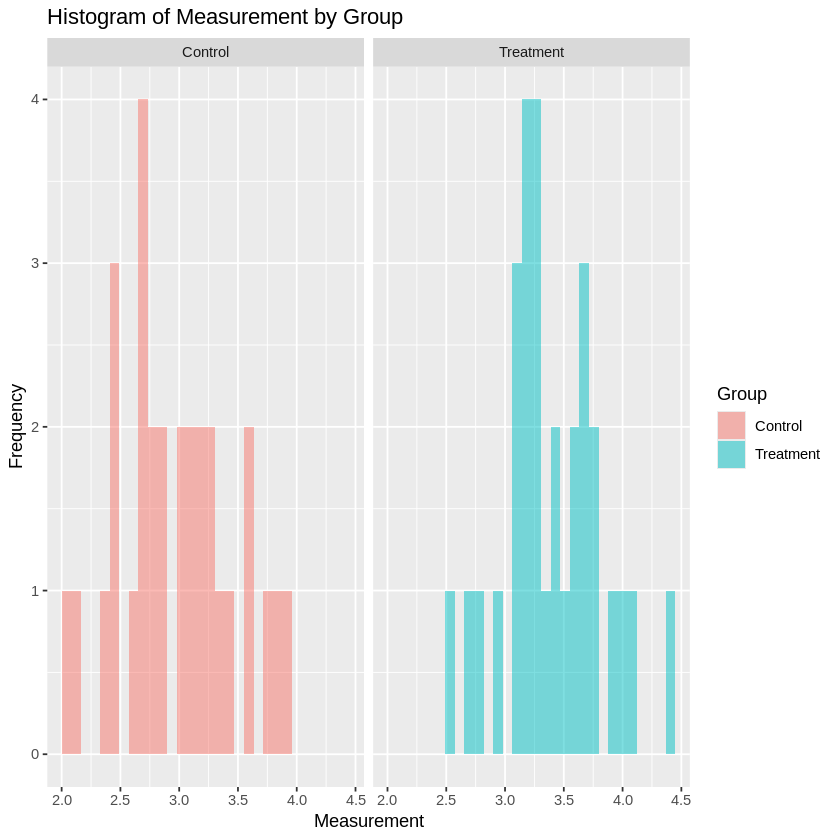

In [19]:
# build a histogram to visualise Measurement in each Group in df_RCT
plot5 <-ggplot(df_RCT, aes(x = Measurement, fill = Group)) +
  geom_histogram(bins = 30, position = "identity", alpha = 0.5) +
  facet_wrap(~ Group, nrow = 1) +
  labs(title = "Histogram of Measurement by Group",
       x = "Measurement",
       y = "Frequency",
       fill = "Group")
plot5

### Test for normality and homogeneity

In [20]:
# test for normality and homogeneity of variance of 'Measurement' for Control and Treatment

# Shapiro-Wilk test for normality
shapiro.test(df_RCT$Measurement[df_RCT$Group == "Control"])
shapiro.test(df_RCT$Measurement[df_RCT$Group == "Treatment"])

# Shapiro-Wilk test interpretation
shapiro_control <- shapiro.test(df_RCT$Measurement[df_RCT$Group == "Control"])
shapiro_test <- shapiro.test(df_RCT$Measurement[df_RCT$Group == "Treatment"])

# Print results and interpretation
print(shapiro_control)
if (shapiro_control$p.value > 0.05) {
  message("Control group: Shapiro-Wilk test p-value > 0.05, data are likely normal.")
} else {
  message("Control group: Shapiro-Wilk test p-value <= 0.05, data may not be normal.")
}

print(shapiro_test)
if (shapiro_test$p.value > 0.05) {
  message("Test group: Shapiro-Wilk test p-value > 0.05, data are likely normal.")
} else {
  message("Test group: Shapiro-Wilk test p-value <= 0.05, data may not be normal.")
}


	Shapiro-Wilk normality test

data:  df_RCT$Measurement[df_RCT$Group == "Control"]
W = 0.97894, p-value = 0.7966



	Shapiro-Wilk normality test

data:  df_RCT$Measurement[df_RCT$Group == "Treatment"]
W = 0.98662, p-value = 0.9614



	Shapiro-Wilk normality test

data:  df_RCT$Measurement[df_RCT$Group == "Control"]
W = 0.97894, p-value = 0.7966



Control group: Shapiro-Wilk test p-value > 0.05, data are likely normal.




	Shapiro-Wilk normality test

data:  df_RCT$Measurement[df_RCT$Group == "Treatment"]
W = 0.98662, p-value = 0.9614



Test group: Shapiro-Wilk test p-value > 0.05, data are likely normal.



In [21]:
# Levene's test for homogeneity of variance
# Install the 'car' package
if (!requireNamespace("car", quietly = TRUE)) {
  install.packages("car")
}
library(car)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rbibutils’, ‘Deriv’, ‘microbenchmark’, ‘Rdpack’, ‘numDeriv’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some




In [22]:
# Define Levene's test
levene_test <- car::leveneTest(Measurement ~ Group, data = df_RCT)

# Print results and interpretation
print(levene_test)
if (levene_test$`Pr(>F)`[1] > 0.05) {
  message("Levene's test p-value > 0.05, variances are likely equal.")
} else {
  message("Levene's test p-value <= 0.05, variances may not be equal.")
}

Warning message in leveneTest.default(y = y, group = group, ...):
“group coerced to factor.”


Levene's Test for Homogeneity of Variance (center = median)
      Df F value Pr(>F)
group  1  1.0763 0.3038
      58               


Levene's test p-value > 0.05, variances are likely equal.



## Statistical analysis

### Frequentist

In [23]:
# use frequentist statistics to compare means in df_RCT between Control and Test in 'group' and interpret the meaning of the hypothesis test

# Perform a paired t-test using the default interface
t_test_result <- t.test(df_RCT$Measurement[df_RCT$Group == "Control"],
                        df_RCT$Measurement[df_RCT$Group == "Treatment"],
                        paired = TRUE)

# Print the t-test results
t_test_result

# Extract relevant information from the t-test results
mean_diff <- t_test_result$estimate
confidence_interval <- t_test_result$conf.int
t_statistic <- t_test_result$statistic
degrees_of_freedom <- t_test_result$parameter
p_value <- t_test_result$p.value

# Print the interpreted results
cat("\n\nMean difference [95% CI]:", mean_diff, "[", confidence_interval, "] \n")
cat("T-statistic:", t_statistic, "\n")
cat("Degrees of freedom:", degrees_of_freedom, "\n")
cat("P-value:", p_value, "\n")

# Interpret the p-value
alpha <- 0.05  # Significance level
if (p_value < alpha) {
  cat("The p-value is less than the significance level (", alpha, ").\n", sep = "")
  cat("We reject the null hypothesis. There is statistically significant evidence of a difference in means between the two groups.\n")
} else {
  cat("The p-value is not less than the significance level (", alpha, ").\n", sep = "")
  cat("We fail to reject the null hypothesis. There is not statistically significant evidence of a difference in means between the two groups.\n")
}


	Paired t-test

data:  df_RCT$Measurement[df_RCT$Group == "Control"] and df_RCT$Measurement[df_RCT$Group == "Treatment"]
t = -3.2647, df = 29, p-value = 0.002812
alternative hypothesis: true mean difference is not equal to 0
95 percent confidence interval:
 -0.6712798 -0.1541622
sample estimates:
mean difference 
      -0.412721 




Mean difference [95% CI]: -0.412721 [ -0.6712798 -0.1541622 ] 
T-statistic: -3.264671 
Degrees of freedom: 29 
P-value: 0.002811533 
The p-value is less than the significance level (0.05).
We reject the null hypothesis. There is statistically significant evidence of a difference in means between the two groups.


### Bayesian

#### Bayesian t-test with BayesFactor
<p>Uses the ttestBF function to compare the means of Measurement between "Control" and "Treatment".
<p>The output gives you a Bayes factor &mdash; i.e., the relative evidence for a difference &mdash; which indicates how much more (or less) likely the data are under the alternative hypothesis (different means) compared to the null hypothesis (equal means).

In [24]:
# install packages
if (!requireNamespace("BayesFactor", quietly = TRUE)) {
  install.packages("BayesFactor")
}
library(BayesFactor)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘elliptic’, ‘contfrac’, ‘deSolve’, ‘coda’, ‘pbapply’, ‘mvtnorm’, ‘hypergeo’


Loading required package: coda

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


************
Welcome to BayesFactor 0.9.12-4.7. If you have questions, please contact Richard Morey (richarddmorey@gmail.com).

Type BFManual() to open the manual.
************



In [25]:
# Run the Bayesian t-test comparing Measurement by Group
bf_result <- ttestBF(formula = Measurement ~ Group, data = df_RCT)
print(bf_result)

# Extract and interpret the Bayes Factor value
bf_value <- extractBF(bf_result)$bf
cat("Bayes factor =", bf_value, "\n")
# Bayes factor > 10: Strong evidence for the alternative hypothesis (a difference between the groups).
# 3 < Bayes factor < 10: Moderate evidence for the alternative hypothesis.
# 1 < Bayes factor < 3: Anecdotal evidence for the alternative hypothesis.
# Bayes factor = 1: No evidence for either hypothesis.
# Bayes factor < 1/3: Anecdotal evidence for the null hypothesis (no difference).
# Bayes factor < 1/10: Moderate evidence for the null hypothesis.
# Bayes factor < 1/100: Strong evidence for the null hypothesis.
if (as.numeric(bf_value) > 10) {
    cat("Strong evidence for a difference in means between the groups.\n")
} else if (as.numeric(bf_value) > 3) {
    cat("Moderate evidence for a difference in means between the groups.\n")
} else if (as.numeric(bf_value) > 1) {
    cat("Anecdotal evidence for a difference in means between the groups.\n")
} else if (as.numeric(bf_value) == 1) {
    cat("No evidence for a difference in means between the groups.\n")
} else if (as.numeric(bf_value) < 1/3) {
    cat("Anecdotal evidence for no difference in means between the groups.\n")
} else if (as.numeric(bf_value) < 1/10) {
    cat("Moderate evidence for no difference in means between the groups.\n")
} else {
    cat("Strong evidence for no difference in means between the groups.\n")
}

Bayes factor analysis
--------------
[1] Alt., r=0.707 : 34.58781 ±0%

Against denominator:
  Null, mu1-mu2 = 0 
---
Bayes factor type: BFindepSample, JZS

Bayes factor = 34.58781 
Strong evidence for a difference in means between the groups.


<p>The null hypothesis (the denominator in the Bayes factor calculation) was that the difference in means (mu1 - mu2) equals zero.
<p>The Bayes factor was computed for independent samples (i.e., the two groups are treated as independent). The analysis used the Jeffreys-Zellner-Siow (JZS) prior, which is a common noninformative prior used in Bayesian t-tests.
<p>The Bayes factor in favor of the alternative hypothesis (that the two groups differ) is approximately 34.59 when using a Cauchy prior with a scale factor of r = 0.707.
<p>Therefore, the data are roughly 34.6 times more likely under the alternative hypothesis than under the null hypothesis. In Bayesian terms, this is considered strong evidence in favor of a difference between the groups.

#### Bayesian estimation
The rstanarm package fits a Bayesian generalized linear model with an automated prior setup.

In [26]:
# Install rstanarm package if not already installed
if (!requireNamespace("rstanarm", quietly = TRUE)) {
  install.packages("rstanarm")
}
library(rstanarm)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘lazyeval’, ‘plyr’, ‘crosstalk’, ‘zoo’, ‘litedown’, ‘igraph’, ‘ggridges’, ‘reshape2’, ‘checkmate’, ‘matrixStats’, ‘tensorA’, ‘distributional’, ‘inline’, ‘gridExtra’, ‘QuickJSR’, ‘colourpicker’, ‘DT’, ‘dygraphs’, ‘gtools’, ‘markdown’, ‘shinyjs’, ‘shinythemes’, ‘threejs’, ‘xts’, ‘bayesplot’, ‘loo’, ‘posterior’, ‘rstan’, ‘rstantools’, ‘shinystan’, ‘RcppParallel’, ‘StanHeaders’, ‘BH’


Loading required package: Rcpp

This is rstanarm version 2.32.1

- See https://mc-stan.org/rstanarm/articles/priors for changes to default priors!

- Default priors may change, so it's safest to specify priors, even if equivalent to the defaults.

- For execution on a local, multicore CPU with excess RAM we recommend calling

  options(mc.cores = parallel::detectCores())


Attaching package: ‘rstanarm’


The following object is masked from ‘package:car’:

    logit




In [27]:
# Use rstanarm package to fit a Bayesian generalized linear model with an automated prior setup.
fit_rstanarm <- stan_glm(Measurement ~ Group, data = df_RCT,
                        family = gaussian(),
                        prior_intercept = normal(0, 10), # Prior for the baseline mean (the intercept)
                        prior = normal(0, 5), # Prior for the effect of Group
                        prior_aux = exponential(1), # Prior for the residual standard deviation
                        iter = 2000, # Number of iterations
                        warmup = 1000, # Number of warmup iterations
                        chains = 4, # Number of chains
                        cores = 4, # Number of cores to use
                        seed = 123, # Random seed
                        )

In [28]:
# Print model summary
print(summary(fit_rstanarm))


Model Info:
 function:     stan_glm
 family:       gaussian [identity]
 formula:      Measurement ~ Group
 algorithm:    sampling
 sample:       4000 (posterior sample size)
 priors:       see help('prior_summary')
 observations: 60
 predictors:   2

Estimates:
                 mean   sd   10%   50%   90%
(Intercept)    3.0    0.1  2.9   3.0   3.1  
GroupTreatment 0.4    0.1  0.3   0.4   0.6  
sigma          0.5    0.0  0.4   0.5   0.5  

Fit Diagnostics:
           mean   sd   10%   50%   90%
mean_PPD 3.2    0.1  3.1   3.2   3.3  

The mean_ppd is the sample average posterior predictive distribution of the outcome variable (for details see help('summary.stanreg')).

MCMC diagnostics
               mcse Rhat n_eff
(Intercept)    0.0  1.0  3019 
GroupTreatment 0.0  1.0  3146 
sigma          0.0  1.0  2740 
mean_PPD       0.0  1.0  3884 
log-posterior  0.0  1.0  1580 

For each parameter, mcse is Monte Carlo standard error, n_eff is a crude measure of effective sample size, and Rhat is 

[1] "Posterior probability plot"


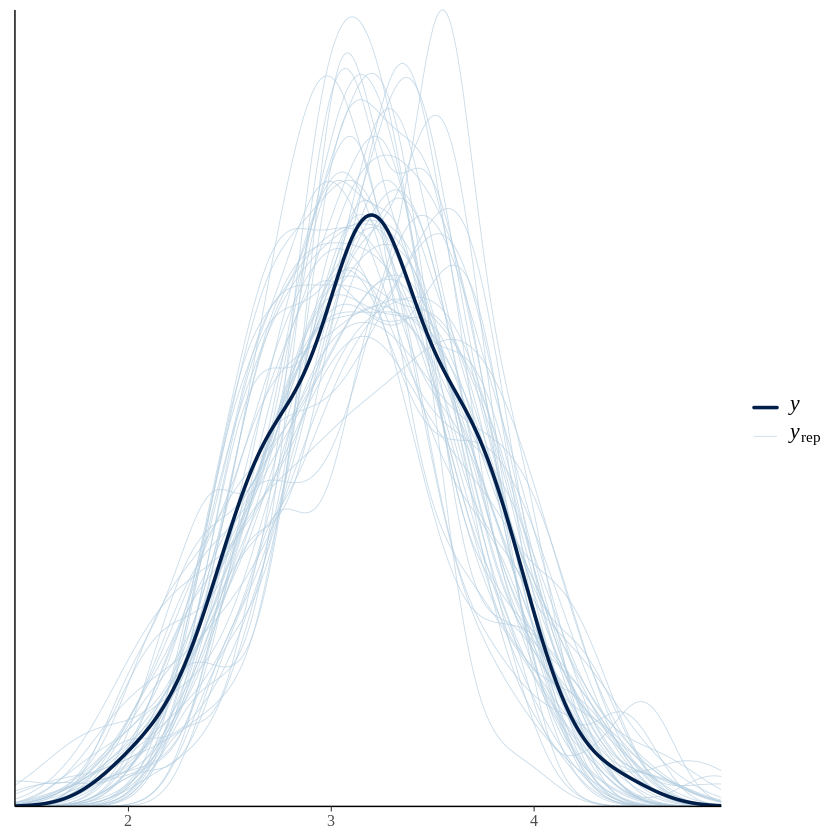

In [29]:
# Visualise the pp_check output
# Good fit = the observed data (black dots) should roughly align with the simulated data (grey lines).
# Poor fit = if the observed data fall consistently outside or inside the distribution of the simulated data, it may indicate model misspecification or problems with the assumptions of the model.
print("Posterior probability plot")
plot6 <- pp_check(fit_rstanarm)
plot6

In [30]:
# Calculate mean difference and 95% credible intervals for the posterior distributon of the stan_glm in fit_rstanarm

# Extract posterior samples
posterior_samples <- as.matrix(fit_rstanarm)

# Extract and interpret the mean differences for the posterior distribution
diff_in_means <- posterior_samples[, "GroupTreatment"]
mean_diff <- mean(diff_in_means)
cat("Mean difference =", mean_diff, "\n")
if(mean_diff > 0){
  cat("The mean difference is positive, suggesting that the Treatment group has a higher mean.\n")
} else if (mean_diff < 0){
  cat("The mean difference is negative, suggesting that the control group has a higher mean.\n")
} else {
  cat("The mean difference is zero, suggesting no difference in means.\n")
}

# Calculate 95% credible intervals
cred_intervals <- apply(posterior_samples, 2, quantile, probs = c(0.025, 0.975))

# Print and interpret the credible intervals
cat("95% Credible Interval for the difference in means =", cred_intervals, "\n")
if (cred_intervals[1] > 0 && cred_intervals[2] > 0) {
  cat("The credible interval lies entirely above zero, suggesting that the mean of the Treatment group is likely greater than the mean of the control group.\n")
} else if (cred_intervals[1] < 0 && cred_intervals[2] < 0) {
  cat("The credible interval lies entirely below zero, suggesting that the mean of the Treatment group is likely less than the mean of the control group.\n")
} else {
  cat("The credible interval includes zero, indicating that there is no clear evidence of a difference between the group means.\n")
}

# Calculate the posterior probability that the difference in means is greater than zero
posterior_prob <- mean(diff_in_means > 0)

# Print and interpret the posterior probability
cat("Posterior probability that the difference in means is greater than zero =", posterior_prob, "\n")
if (posterior_prob > 0.95) {
  cat("The posterior probability is high ( > 0.95), providing strong evidence that the mean of the Treatment group is greater than the mean of the control group.\n")
} else if (posterior_prob > 0.9){
    cat("The posterior probability is moderately high ( > 0.9), providing evidence that the mean of the Treatment group is greater than the mean of the control group.\n")
} else if (posterior_prob > 0.5) {
  cat("The posterior probability is greater than 0.5, suggesting that the mean of the Treatment group is more likely to be greater than the mean of the control group, but the evidence is not strong.\n")
} else if (posterior_prob < 0.05){
  cat("The posterior probability is low ( < 0.05), providing strong evidence that the mean of the Treatment group is less than the mean of the control group.\n")
} else if(posterior_prob < 0.1){
  cat("The posterior probability is moderately low ( < 0.1), providing evidence that the mean of the Treatment group is less than the mean of the control group.\n")
} else {
  cat("The posterior probability is around 0.5, indicating that there is no clear evidence to suggest which group has a higher mean.\n")
}

Mean difference = 0.4144711 
The mean difference is positive, suggesting that the Treatment group has a higher mean.
95% Credible Interval for the difference in means = 2.805617 3.139902 0.1787957 0.6412399 0.3863128 0.5626103 
The credible interval lies entirely above zero, suggesting that the mean of the Treatment group is likely greater than the mean of the control group.
Posterior probability that the difference in means is greater than zero = 1 
The posterior probability is high ( > 0.95), providing strong evidence that the mean of the Treatment group is greater than the mean of the control group.


## Load the data into dabestr for PAIRED group comparison

In [31]:
# Load the data into `dabest` with 5000 bootstrap samples. Use paired="baseline" to indicate that the data are paired and id_col=id to help DABEST find the paired identiers
# NOTE: By default, 5000 resamples will be used to generate the effect size bootstraps
# NOTE: When only 2 paired data groups are involved, assigning either “baseline” or “sequential” to paired will give you the same numerical results.
dabest_RCT <- load(
    data = df_RCT,
    x = Group,
    y = Measurement,
    idx = c("Control", "Treatment"),
    paired = "sequential",
    id_col = ID,
    resamples = 5000,
    ci = 95
)

## Analyse and view the estimation plot

In [32]:
# calculate the mean difference (use median＿diff for the median difference)
dabest_RCT.mean_diff <- mean_diff(dabest_RCT)
print(dabest_RCT.mean_diff)

DABESTR v2025.3.14

Good afternoon!
The current time is 13:20 PM on Monday April 28, 2025.

The paired mean difference between Treatment and Control is 0.413 [95%CI 0.178, 0.634].
The p-value of the two-sided permutation t-test is 0.0012, calculated for legacy purposes only.

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
Any p-value reported is the probability of observing the effect size (or greater),
assuming the null hypothesis of zero difference is true.
For each p-value, 5000 reshuffles of the control and test labels were performed.



In [34]:
# view all statistical outputs
print(dabest_RCT.mean_diff$boot_result)

# A tibble: 1 × 11
  control_group test_group bootstraps nboots bca_ci_low bca_ci_high pct_ci_low
  <chr>         <chr>      <list>      <int>      <dbl>       <dbl>      <dbl>
1 Control       Treatment  <dbl>        5000      0.178       0.634      0.176
# ℹ 4 more variables: pct_ci_high <dbl>, ci <dbl>, difference <dbl>,
#   weight <dbl>


In [35]:
# extract the permutation test’s p values
print(dabest_RCT.mean_diff$permtest_pvals$pval_permtest)

[1] 0.0038


In [36]:
# extract the p value results
print(dabest_RCT.mean_diff$permtest_pvals$pvalues)

[[1]]
[[1]]$pvalue_wilcoxon
[1] 0.001236185

[[1]]$wilcoxon

	Wilcoxon rank sum test with continuity correction

data:  control and test
W = 231, p-value = 0.001236
alternative hypothesis: true location shift is not equal to 0


[[1]]$statistic_wilcoxon
  W 
231 

[[1]]$paired_t

	Paired t-test

data:  control and test
t = -3.2647, df = 29, p-value = 0.002812
alternative hypothesis: true mean difference is not equal to 0
95 percent confidence interval:
 -0.6712798 -0.1541622
sample estimates:
mean difference 
      -0.412721 


[[1]]$pvalue_paired_students_t
[1] 0.002811533

[[1]]$statistic_paired_students_t
        t 
-3.264671 




#### Gardner-Altman estimation plot

[1] "Gardner-Altman estimation plot"


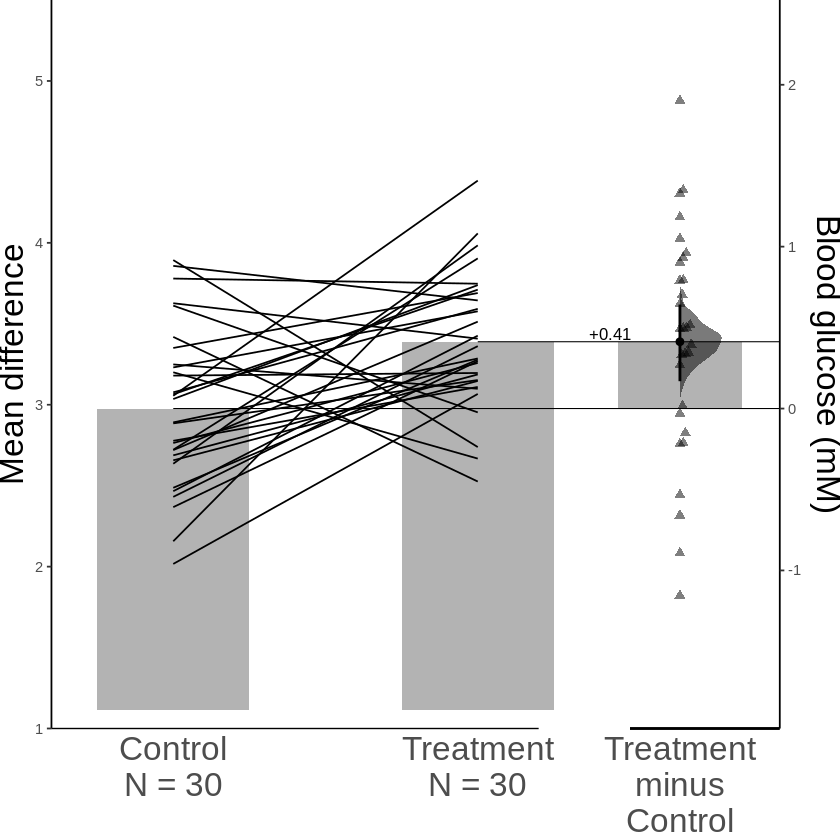

In [33]:
# build the estimation plot (Gardner-Altman plot) for the mean difference
# edit aesthetics at https://acclab.github.io/dabestr/articles/plot_aesthetics.html
print("Gardner-Altman estimation plot")
plot7 <- dabest_plot(dabest_RCT.mean_diff,
  float_contrast = TRUE, # TRUE = Gardner-Altman estimation plot. FALSE = Cumming estimation plot
  swarm_label = "Mean difference",
  contrast_label = "Blood glucose (mM)",
  swarm_ylim = c(1, 5.5), contrast_ylim = c(2, -2),
  raw_marker_size = 0.5, raw_marker_alpha = 2, raw_bar_width = 0.5,
  swarm_x_text = 20,
  swarm_y_text = 20,
  contrast_x_text = 20,
  contrast_y_text = 20
)
plot7

#### Cumming estimation plot

[1] "Cumming estimation plot"


Warning message in get_plot_component(plot, "guide-box"):
“Multiple components found; returning the first one. To return all, use `return_all = TRUE`.”


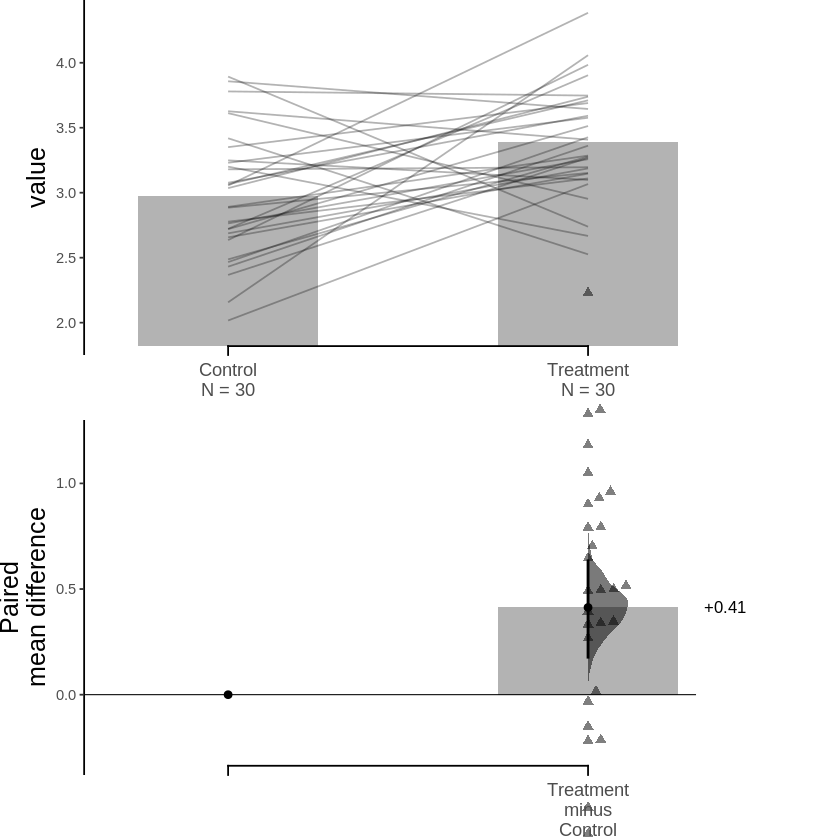

In [ ]:
# Instead of a Gardner-Altman plot, you can generate a Cumming estimation plot by setting float_contrast=False in the plot() method.
print("Cumming estimation plot")
plot8 <- dabest_plot(dabest_RCT.mean_diff, float_contrast = FALSE, raw_marker_size = 0.5, raw_marker_alpha = 0.3, contrast_ylim = c(-0.3, 1.3))
plot8